<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 2

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 99101581
Name = 'Daniyal'
Last_Name = 'Rasti'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

## Question 1) Convolutional Neural Networks ``(50 pt.)``

In this question, you'll be coding up a convolutional neural network from scratch to classify images using PyTorch.  

### Instructions
- Install PyTorch following the instructions [here](https://pytorch.org/).
- Install the [`torchinfo` package](https://github.com/TylerYep/torchinfo) to visualize the network architecture and the number of parameters. The maximum number of parameters you are allowed to use for your network is **100,000**. 
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

### Data Preparation
In this assignment, we will use the Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  

#### Data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.  

#### Labels

Each training and test example is assigned to one of the following labels:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Fashion-MNIST is included in the `torchvision` library.

In [2]:
# Import required packages
from torchvision.datasets import FashionMNIST
from torchvision.transforms import Compose, ToTensor, Normalize
import matplotlib.pyplot as plt

d:\Apps\Anaconda\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# Transform to normalize the data and convert to a tensor
transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

# Download the data
dataset = FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)

100%|██████████| 26421880/26421880 [00:37<00:00, 708039.93it/s] 


Extracting MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 330477.48it/s]


Extracting MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1662662.03it/s]


Extracting MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST\raw



### Data Exploration
Let's take a look at the classes in our dataset.

In [4]:
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now, visualize an instance from each class.

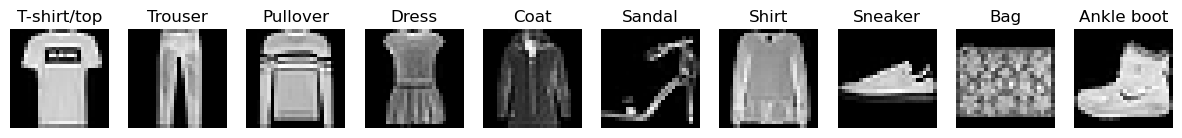

In [6]:
import matplotlib.pyplot as plt

# Define the class names for the FashionMNIST dataset
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Function to visualize an instance from each class
def visualize_classes(dataset, class_names):
    # Dictionary to store the first instance of each class
    class_instances = {class_name: None for class_name in class_names}
    cnt = 0
    # Iterate through the dataset to find one instance per class
    for image, label in dataset:
        class_name = class_names[label]
        if class_instances[class_name] is None:
            class_instances[class_name] = image
            cnt +=1
        # Break if we have found an instance for each class
        if cnt == len(class_names):
            break

    # Plot each class instance
    fig, axes = plt.subplots(1, len(class_names), figsize=(15, 15))
    for idx, (class_name, image) in enumerate(class_instances.items()):
        axes[idx].imshow(image.squeeze(), cmap='gray')
        axes[idx].set_title(class_name)
        axes[idx].axis('off')

    plt.show()

# Visualize instances from each class
visualize_classes(dataset, class_names)


### Creating Training and Validation Datasets

The `split_indices` function takes in the size of the entire dataset, `n`, the fraction of data to be used as validation set, `val_frac`, and the random seed and returns the indices of the data points to be added to the validation dataset. 

In [8]:
def split_indices(n, val_frac, seed):
    # Determine the size of the validation set
    n_val = int(val_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [10]:
######################
#   YOUR CODE HERE   #
######################
import numpy as np
val_frac =  0.2
rand_seed =  74

train_indices, val_indices = split_indices(len(dataset), val_frac, rand_seed)
print("number of samples in training set: {}".format(len(train_indices)))
print("number of samples in validation set: {}".format(len(val_indices)))

number of samples in training set: 48000
number of samples in validation set: 12000


Next, we make use of the built-in dataloaders in PyTorch to create iterables of our our training and validation sets. This helps in avoiding fitting the whole dataset into memory and only loads a batch of the data that we can decide. 

In [11]:
# Import required packages
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [12]:
######################
#   YOUR CODE HERE   #
######################
batch_size = 64

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                   batch_size,
                   sampler=val_sampler)

Plot images in a sample batch of data.

Sample batch of training data:


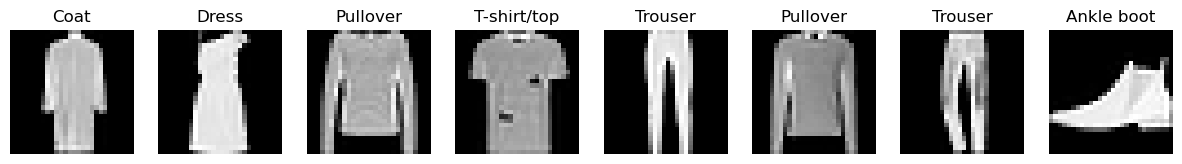

Sample batch of validation data:


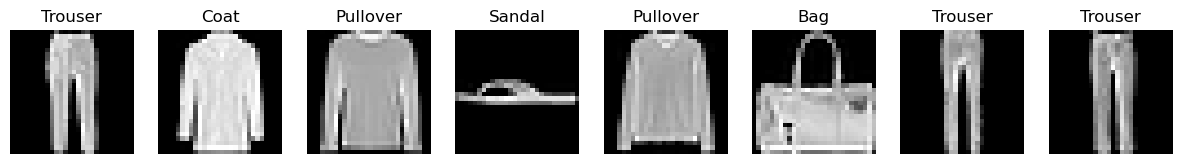

In [13]:
######################
#   YOUR CODE HERE   #
######################
def plot_images(dl):
    # Get a batch of data
    batch = next(iter(dl))
    images, labels = batch

    # Plot images
    fig, axes = plt.subplots(figsize=(15, 7), ncols=8)
    for i in range(8):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.show()

# Plot images in a sample batch of training data
print("Sample batch of training data:")
plot_images(train_dl)

# Plot images in a sample batch of validation data
print("Sample batch of validation data:")
plot_images(val_dl)

### Building the Model
Create your model by defining the network architecture in the `ImageClassifierNet` class.<br>
**NOTE:** The number of parameters in your network must be $\leq$ 100,000.

In [14]:
# Import required packages
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

In [25]:
class ImageClassifierNet(nn.Module):
    def __init__(self, n_channels=1):
        super(ImageClassifierNet, self).__init__()
        
        # Define convolutional layers
        self.conv1 = nn.Conv2d(n_channels, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        
        # Define fully connected layers
        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)  # 10 classes in FashionMNIST
        
        # Initialize weights
        self._initialize_weights()
        
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
        
    def forward(self, X):
        # Apply convolutional layers with ReLU activation and max pooling
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, kernel_size=2, stride=2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, kernel_size=2, stride=2)
        
        # Flatten the tensor for fully connected layers
        X = X.view(-1, 16 * 7 * 7)
        
        # Apply fully connected layers with ReLU activation
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        
        return X

In [26]:
model = ImageClassifierNet()

The following code block prints your network architecture. It also shows the total number of parameters in your network (see `Total params`).  

**NOTE: The total number of parameters in your model should be <= 100,000.**

In [27]:
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifierNet                       [64, 10]                  --
├─Conv2d: 1-1                            [64, 8, 28, 28]           80
├─Conv2d: 1-2                            [64, 16, 14, 14]          1,168
├─Linear: 1-3                            [64, 64]                  50,240
├─Linear: 1-4                            [64, 10]                  650
Total params: 52,138
Trainable params: 52,138
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 21.92
Input size (MB): 0.20
Forward/backward pass size (MB): 4.85
Params size (MB): 0.21
Estimated Total Size (MB): 5.26

### Train the model
Complete the `train_model` function to train your model on a dataset. Tune your network architecture and hyperparameters on the validation set.

In [51]:
def train_model(n_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr):
    """
    Trains the model on a dataset.
    
    Args:
        n_epochs: number of epochs
        model: ImageClassifierNet object
        train_dl: training dataloader
        val_dl: validation dataloader
        loss_fn: the loss function
        opt_fn: the optimizer
        lr: learning rate
    
    Returns:
        The trained model. 
        A tuple of (model, train_losses, val_losses, train_accuracies, val_accuracies)
    """
    # Initialize optimizer
    optimizer = opt_fn(model.parameters(), lr=lr)
    
    # Move model to the appropriate device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Record these values at the end of each epoch
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
    
    # Training loop
    for epoch in range(n_epochs):
        model.train()  # Set model to training mode
        train_loss, correct, total = 0, 0, 0
        
        for images, labels in train_dl:
            # Move data to the appropriate device
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()  # Clear gradients
            
            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Record training loss
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(train_loss / len(train_dl))
        train_accuracies.append(100 * correct / total)
        
        # Validation loop
        model.eval()  # Set model to evaluation mode
        val_loss, correct, total = 0, 0, 0
        
        with torch.no_grad():
            for images, labels in val_dl:
                # Move data to the appropriate device
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        if len(val_dl) != 0 :
            val_losses.append(val_loss / len(val_dl))
            val_accuracies.append(100 * correct / total)
            print(f'Epoch {epoch + 1}/{n_epochs}, '
                f'Train Loss: {train_loss / len(train_dl):.4f}, '
                f'Train Acc: {train_accuracies[-1]:.2f}%, '
                f'Val Loss: {val_loss / len(val_dl):.4f}, '
                f'Val Acc: {val_accuracies[-1]:.2f}%')
        else :
            print(f'Epoch {epoch + 1}/{n_epochs}, '
                f'Train Loss: {train_loss / len(train_dl):.4f}, '
                f'Train Acc: {train_accuracies[-1]:.2f}%, ')
        

    return model, train_losses, val_losses, train_accuracies, val_accuracies

In [38]:
######################
#   YOUR CODE HERE   #
######################
import torch
import torch.optim as optim
num_epochs = 10  # Number of training epochs
loss_fn = torch.nn.CrossEntropyLoss()  # Define the loss function
opt_fn = optim.SGD  # Select an optimizer (Stochastic Gradient Descent)
lr = 0.01  # Set the learning rate

In [39]:
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, model, train_dl, val_dl, loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.4418, Train Acc: 84.09%, Val Loss: 0.3789, Val Acc: 86.70%
Epoch 2/10, Train Loss: 0.3975, Train Acc: 85.68%, Val Loss: 0.3811, Val Acc: 86.12%
Epoch 3/10, Train Loss: 0.3678, Train Acc: 86.67%, Val Loss: 0.3328, Val Acc: 88.15%
Epoch 4/10, Train Loss: 0.3481, Train Acc: 87.47%, Val Loss: 0.3374, Val Acc: 87.59%
Epoch 5/10, Train Loss: 0.3354, Train Acc: 87.96%, Val Loss: 0.3111, Val Acc: 88.70%
Epoch 6/10, Train Loss: 0.3210, Train Acc: 88.47%, Val Loss: 0.3106, Val Acc: 88.83%
Epoch 7/10, Train Loss: 0.3122, Train Acc: 88.75%, Val Loss: 0.3106, Val Acc: 88.87%
Epoch 8/10, Train Loss: 0.3022, Train Acc: 89.17%, Val Loss: 0.2916, Val Acc: 89.28%
Epoch 9/10, Train Loss: 0.2949, Train Acc: 89.34%, Val Loss: 0.2953, Val Acc: 89.38%
Epoch 10/10, Train Loss: 0.2863, Train Acc: 89.72%, Val Loss: 0.2841, Val Acc: 89.69%


### Plot loss and accuracy

In [40]:
def plot_accuracy(train_accuracies, val_accuracies):
    """Plot accuracies"""
    plt.plot(train_accuracies, "-x")
    plt.plot(val_accuracies, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Training", "Validation"])
    plt.title("Accuracy vs. No. of epochs")

def plot_losses(train_losses, val_losses):
    """Plot losses"""
    plt.plot(train_losses, "-x")
    plt.plot(val_losses, "-o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training", "Validation"])
    plt.title("Loss vs. No. of Epochs")

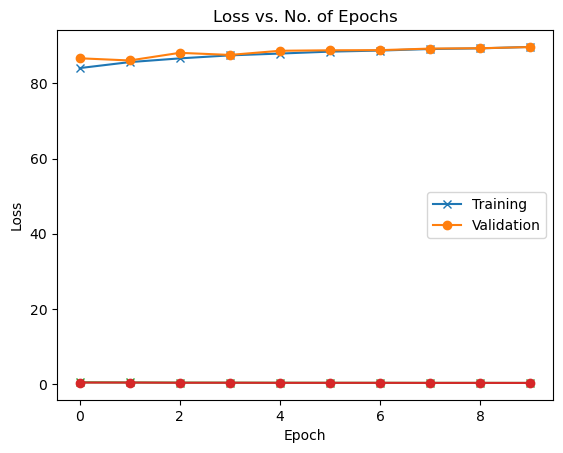

In [42]:
plot_accuracy(train_accuracies, val_accuracies)
plot_losses(train_losses, val_losses)

### Train a model on the entire dataset

In [43]:
indices, _ = split_indices(len(dataset), 0, rand_seed)

sampler = SubsetRandomSampler(indices)
dl = DataLoader(dataset, batch_size, sampler=sampler)

In [44]:
######################
#   YOUR CODE HERE   #
######################
num_epochs = 10  # Max number of training epochs
lr = 0.01  # Set the learning rate

In [52]:
model, _, _, _, _ = train_model(num_epochs, model, dl, [], loss_fn, opt_fn, lr)

Epoch 1/10, Train Loss: 0.2608, Train Acc: 90.58%, 
Epoch 2/10, Train Loss: 0.2546, Train Acc: 90.75%, 
Epoch 3/10, Train Loss: 0.2502, Train Acc: 90.87%, 
Epoch 4/10, Train Loss: 0.2455, Train Acc: 91.12%, 
Epoch 5/10, Train Loss: 0.2403, Train Acc: 91.25%, 
Epoch 6/10, Train Loss: 0.2372, Train Acc: 91.45%, 
Epoch 7/10, Train Loss: 0.2328, Train Acc: 91.49%, 
Epoch 8/10, Train Loss: 0.2290, Train Acc: 91.60%, 
Epoch 9/10, Train Loss: 0.2257, Train Acc: 91.83%, 
Epoch 10/10, Train Loss: 0.2220, Train Acc: 91.92%, 


### Check Predictions
Now, you should evaluate your model on dataset. Specifically, you should calculate the class probabilities for each image, and then visualize these probabilities along with the image itself. Please include a function `view_prediction` in your code that takes an image, its label, the calculated probabilities, and the list of class names as input, and plots the image along with the probabilities.

In [53]:
######################
#   YOUR CODE HERE   #
######################
def view_prediction(image, true_label, pred_probs, class_names):
    """
    Visualizes the image along with predicted class probabilities.
    
    Args:
        image (Tensor): Input image tensor.
        true_label (int): True label of the image.
        pred_probs (Tensor): Predicted probabilities of each class.
        class_names (list): List of class names.
    """
    # Convert tensors to numpy arrays
    image = image.squeeze().cpu().numpy()  # Assuming image is on CPU and in tensor format
    pred_probs = pred_probs.squeeze().cpu().numpy()  # Convert predicted probabilities to numpy array
    
    # Create a figure
    plt.figure(figsize=(8, 4))
    
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'True Label: {class_names[true_label]}')
    
    # Plot predicted probabilities
    plt.subplot(1, 2, 2)
    plt.barh(np.arange(len(class_names)), pred_probs, alpha=0.8)
    plt.yticks(np.arange(len(class_names)), class_names)
    plt.xlabel('Probability')
    plt.title('Class Probabilities')
    plt.gca().invert_yaxis()  # Invert y-axis to match image plot
    
    plt.tight_layout()
    plt.show()


### Save the model

In [54]:
torch.save(model, 'model')

### Calculate accuracy on the test set

In [55]:
test_dataset = FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
test_dl = DataLoader(test_dataset, batch_size)

In [58]:
def evaluate(model, test_dl):
    """
    Evaluates your model on the test data.
    
    Args:
        model: ImageClassifierNet object
        test_dl: test dataloader
    
    Returns: 
        Test accuracy.
    """
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    with torch.no_grad():
        for images, labels in test_dl:
            # Move data to the appropriate device
            images, labels = images.to(device), labels.to(device)  # Assuming device is defined globally
            
            # Forward pass
            outputs = model(images)
            
            # Get predicted labels
            _, predicted = torch.max(outputs.data, 1)
            
            # Total number of labels
            total += labels.size(0)
            
            # Total correct predictions
            correct += (predicted == labels).sum().item()
    
    # Calculate accuracy
    accuracy = correct / total
    return accuracy


In [59]:
print("Test Accuracy = {:.4f}".format(evaluate(model, test_dl)))

Test Accuracy = 0.8952
